In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pylab import rcParams
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection  import train_test_split,cross_val_score,GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df =sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df['code'] = df['species'].replace({'setosa':0,
                                   'versicolor':1,
                                   'virginica':2})
df['code'].unique()

array([0, 1, 2], dtype=int64)

Text(0, 0.5, 'Petal Width')

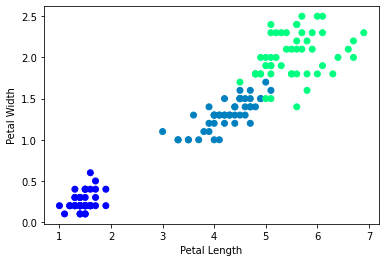

In [4]:
plt.scatter(df['petal_length'],df['petal_width'],c= df['code'],cmap='winter')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [5]:
model = KMeans(n_clusters = 3,init ='k-means++' ,max_iter=300,n_init=10,random_state =42)
model

KMeans(n_clusters=3, random_state=42)

In [6]:
model.fit(df[['petal_length','petal_width']])

KMeans(n_clusters=3, random_state=42)

In [7]:
print("Error:\n",model.inertia_)
print("Prediction:\n",model.labels_)
print("Centroids:\n",model.cluster_centers_)
print("Silhoutte Score:",silhouette_score(df[['petal_length','petal_width']],model.labels_))

Error:
 31.371358974358984
Prediction:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]
Centroids:
 [[5.59583333 2.0375    ]
 [1.462      0.246     ]
 [4.26923077 1.34230769]]
Silhoutte Score: 0.6604800085022658


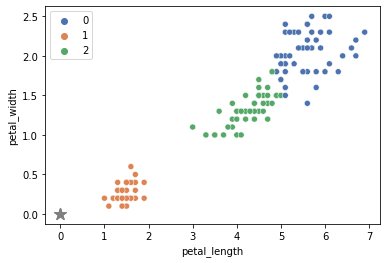

In [8]:
sns.scatterplot( x=df["petal_length"],
                y=df["petal_width"],
                hue=model.labels_,
                palette="deep")
plt.scatter( model.cluster_centers_[:, 0] / 1e6,
             model.cluster_centers_[:,1] / 1e6,
             color="gray",
             marker="*",
             s=150 );

In [9]:
x =df[['petal_length','petal_width']]

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


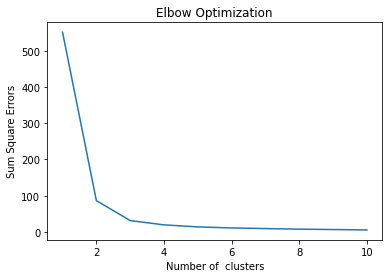

In [10]:
sse = []
k_val = np.arange(1,11,1)
for k in k_val :
    model = KMeans(n_clusters = k, init = 'k-means++', max_iter=300 ,n_init=10 ,random_state=42)
    model.fit(x)
    sse.append( model.inertia_)

    
plt.plot(k_val,sse)
plt.title('Elbow Optimization')
plt.xlabel('Number of  clusters')
plt.ylabel('Sum Square Errors');

[86.39021984551395]
[0.7653904101383076]
[86.39021984551395, 31.371358974358984]
[0.7653904101383076, 0.6604800085022658]
[86.39021984551395, 31.371358974358984, 19.483000899685116]
[0.7653904101383076, 0.6604800085022658, 0.6127580795614039]
[86.39021984551395, 31.371358974358984, 19.483000899685116, 13.91690875790876]
[0.7653904101383076, 0.6604800085022658, 0.6127580795614039, 0.588373271407563]
[86.39021984551395, 31.371358974358984, 19.483000899685116, 13.91690875790876, 11.057257664362927]
[0.7653904101383076, 0.6604800085022658, 0.6127580795614039, 0.588373271407563, 0.5762928191225791]
[86.39021984551395, 31.371358974358984, 19.483000899685116, 13.91690875790876, 11.057257664362927, 9.281343349632824]
[0.7653904101383076, 0.6604800085022658, 0.6127580795614039, 0.588373271407563, 0.5762928191225791, 0.5640984344798261]
[86.39021984551395, 31.371358974358984, 19.483000899685116, 13.91690875790876, 11.057257664362927, 9.281343349632824, 7.669666305916307]
[0.7653904101383076, 0.6

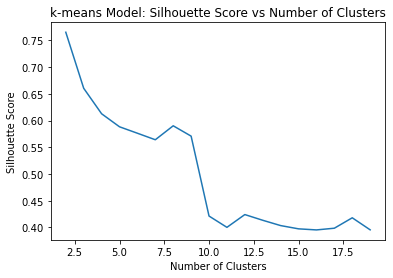

In [11]:
n_clusters = range(2, 20)
inertia_errors = []
silhouette_scores = []

for n in n_clusters:
    model = KMeans(n_clusters=n, random_state=42)
    model.fit(x)
    inertia_errors.append(model.inertia_)
    silhouette_scores.append(silhouette_score(x, model.labels_))
    print(inertia_errors)
    print(silhouette_scores)
    
plt.plot(n_clusters, silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("k-means Model: Silhouette Score vs Number of Clusters");

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kelvin\AppData\Local\Temp\ipykernel_8748\431251659.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,10),silhoutte_score,"bo-",color="blue",
findfont: Font family ['Aerial'] not found. Falling back to DejaVu Sans.


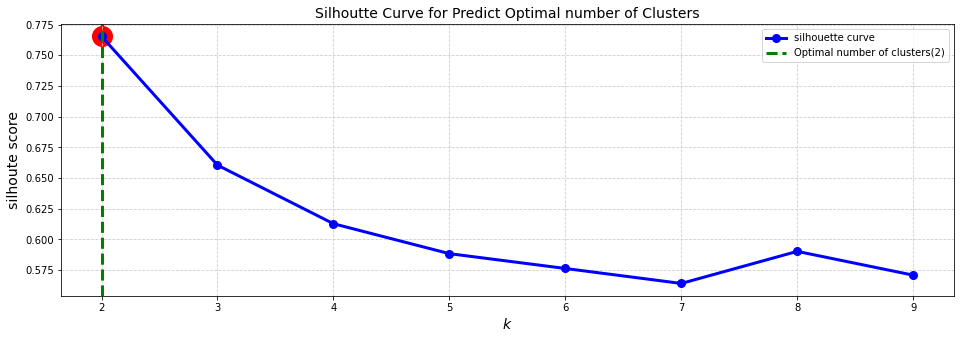

In [12]:
import numpy as np
kmeans_per_k = [KMeans(n_clusters =k,random_state =42).fit(x) for k in range(1,10)]
silhoutte_score = [silhouette_score(x,model.labels_)
                   for model in kmeans_per_k[1:]]
silhoutte_score




rcParams['figure.figsize'] = 16,5
plt.plot(range(2,10),silhoutte_score,"bo-",color="blue",
        linewidth=3,markersize=8,label="silhouette curve")
plt.xlabel('$k$',fontsize=14,family='Aerial')
plt.ylabel('silhoute score',fontsize=14,family='Aerial')
plt.grid(which='major',color='#cccccc',linestyle='--')
plt.title('Silhoutte Curve for Predict Optimal number of Clusters',family='Aerial',fontsize=14)

k = np.argmax(silhoutte_score) + 2
plt.axvline(x=k, linestyle ='--', c='green',linewidth=3,label='Optimal number of clusters({})'.format(k))
plt.scatter(k,silhoutte_score[k-2],c='red',s=400)
plt.legend()
plt.show()

In [13]:
final_model = KMeans(n_clusters = 2,random_state = 42)
# Fit model to data
final_model.fit(x)

KMeans(n_clusters=2, random_state=42)

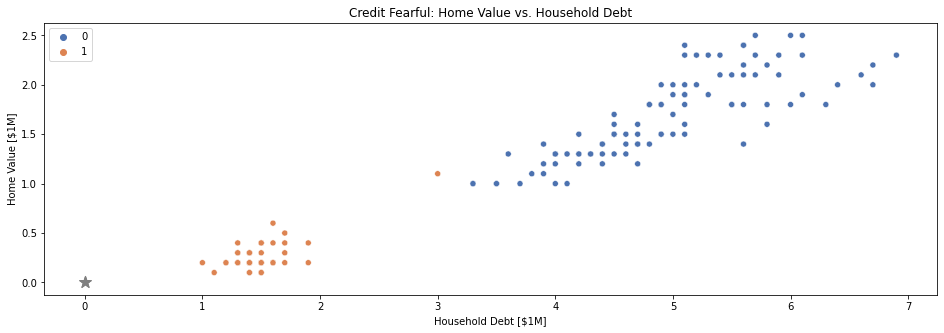

In [14]:
centroids = final_model.cluster_centers_
sns.scatterplot(x =df["petal_length"],
                y = df["petal_width"],
                hue = final_model.labels_,
              palette ="deep")
plt.scatter(
    x = final_model.cluster_centers_[:,0]/1e6, y= final_model.cluster_centers_[:,1]/1e6,
    color = "gray",
    marker = "*", s= 150
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [15]:
ss = silhouette_score(x, final_model.labels_)
print("Silhouette Score (3 clusters):", ss)

Silhouette Score (3 clusters): 0.7653904101383076


In [16]:
inertia = final_model.inertia_
inertia

86.39021984551395

In [17]:
xgb = x.groupby(final_model.labels_).mean()
xgb

,petal_length,petal_width
0,4.925253,1.681818
1,1.492157,0.262745


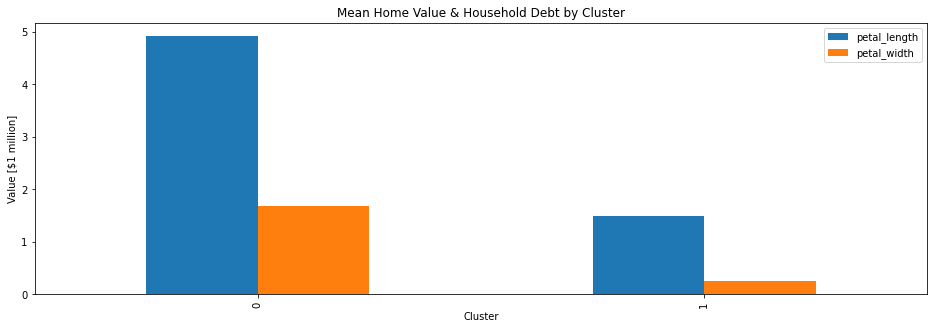

In [18]:
xgb.plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Value [$1 million]")
plt.title("Mean Home Value & Household Debt by Cluster");

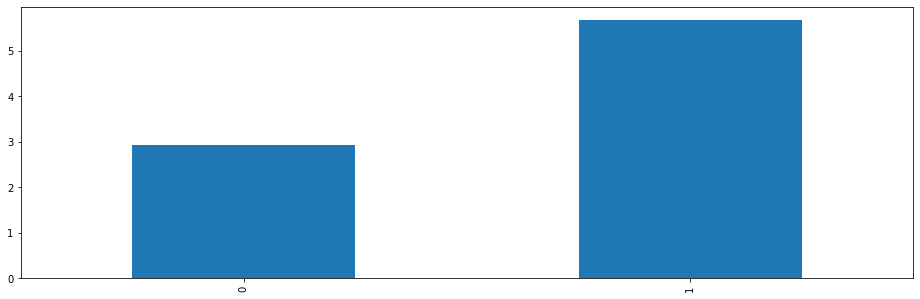

In [19]:
(xgb["petal_length"]/xgb["petal_width"]).plot(kind="bar");

In [20]:
#model
model = KMeans(random_state=42)
#grid
param = {
    'n_clusters': np.arange(1,11,1),
    'init':['k-means++', 'random'],
    'max_iter':[100,200,300,400,500],
    'n_init':  np.arange(1,11,1)      
}
param

{'n_clusters': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'init': ['k-means++', 'random'],
 'max_iter': [100, 200, 300, 400, 500],
 'n_init': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}

In [21]:
grid = GridSearchCV(model,param,cv=5)

In [22]:
grid.fit(x)

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

GridSearchCV(cv=5, estimator=KMeans(random_state=42),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [100, 200, 300, 400, 500],
                         'n_clusters': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_init': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [23]:
grid.best_params_

{'init': 'k-means++', 'max_iter': 100, 'n_clusters': 10, 'n_init': 10}

In [24]:
grid.best_score_

-1.9253055523868106

In [27]:
final_model = KMeans(n_clusters = 10,random_state = 42,init ='k-means++',max_iter= 100,n_init = 10)
# Fit model to data
final_model.fit(x)

KMeans(max_iter=100, n_clusters=10, random_state=42)

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kelvin\AppData\Local\Temp\ipykernel_8748\431251659.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,10),silhoutte_score,"bo-",color="blue",


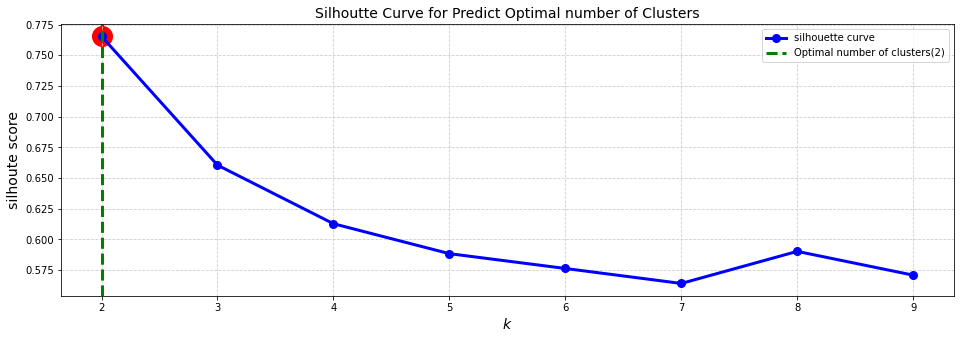

In [28]:
import numpy as np
kmeans_per_k = [KMeans(n_clusters =k,random_state =42).fit(x) for k in range(1,10)]
silhoutte_score = [silhouette_score(x,model.labels_)
                   for model in kmeans_per_k[1:]]
silhoutte_score




rcParams['figure.figsize'] = 16,5
plt.plot(range(2,10),silhoutte_score,"bo-",color="blue",
        linewidth=3,markersize=8,label="silhouette curve")
plt.xlabel('$k$',fontsize=14,family='Aerial')
plt.ylabel('silhoute score',fontsize=14,family='Aerial')
plt.grid(which='major',color='#cccccc',linestyle='--')
plt.title('Silhoutte Curve for Predict Optimal number of Clusters',family='Aerial',fontsize=14)

k = np.argmax(silhoutte_score) + 2
plt.axvline(x=k, linestyle ='--', c='green',linewidth=3,label='Optimal number of clusters({})'.format(k))
plt.scatter(k,silhoutte_score[k-2],c='red',s=400)
plt.legend()
plt.show()